Original w: [ 0.          0.          0.57171209  0.         -0.34113959  0.
  0.          0.          0.7461696   0.        ]
Rounded w: [ 0.          0.          0.57171209  0.         -0.34113959  0.
  0.          0.          0.7461696   0.        ]
Original w: [ 0.58034589 -0.         -0.         -0.         -0.         -0.
 -0.2077849  -0.         -0.          0.78741608]
Rounded w: [ 0.58034589  0.          0.          0.          0.          0.
 -0.2077849   0.          0.          0.78741608]
Original w: [0.         0.2740615  0.         0.         0.         0.
 0.         0.96171217 0.         0.        ]
Rounded w: [0.         0.2740615  0.         0.         0.         0.
 0.         0.96171217 0.         0.        ]
Original w: [0.         0.         0.9908021  0.         0.         0.
 0.13531885 0.         0.         0.        ]
Rounded w: [0.         0.         0.9908021  0.         0.         0.
 0.13531885 0.         0.         0.        ]
Original w: [0. 0. 0. 0. 0. 

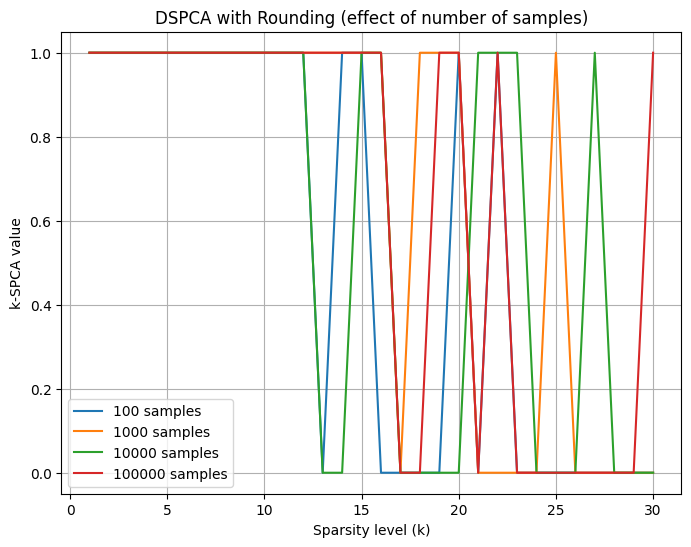

Original w: [0.9168488  0.39923461]
Rounded w: [0.9168488  0.39923461]
Original w: [0. 1.]
Rounded w: [0. 1.]
Original w: [0. 0.]
Rounded w: [0. 0.]
Original w: [0. 1.]
Rounded w: [0. 1.]
Original w: [0. 0.]
Rounded w: [0. 0.]
Original w: [0. 0.]
Rounded w: [0. 0.]
Original w: [0. 1.]
Rounded w: [0. 1.]
Original w: [0. 1.]
Rounded w: [0. 1.]
Original w: [0. 0.]
Rounded w: [0. 0.]
Original w: [1. 0.]
Rounded w: [1. 0.]
Original w: [0. 1.]
Rounded w: [0. 1.]
Original w: [0. 1.]
Rounded w: [0. 1.]
Original w: [0. 1.]
Rounded w: [0. 1.]
Original w: [0. 1.]
Rounded w: [0. 1.]
Original w: [1. 0.]
Rounded w: [1. 0.]
Original w: [0. 0.]
Rounded w: [0. 0.]
Original w: [1. 0.]
Rounded w: [1. 0.]
Original w: [0. 1.]
Rounded w: [0. 1.]
Original w: [0. 1.]
Rounded w: [0. 1.]
Original w: [0. 1.]
Rounded w: [0. 1.]
Original w: [0. 1.]
Rounded w: [0. 1.]
Original w: [0. 1.]
Rounded w: [0. 1.]
Original w: [1. 0.]
Rounded w: [1. 0.]
Original w: [0. 1.]
Rounded w: [0. 1.]
Original w: [0. 1.]
Rounded w: [

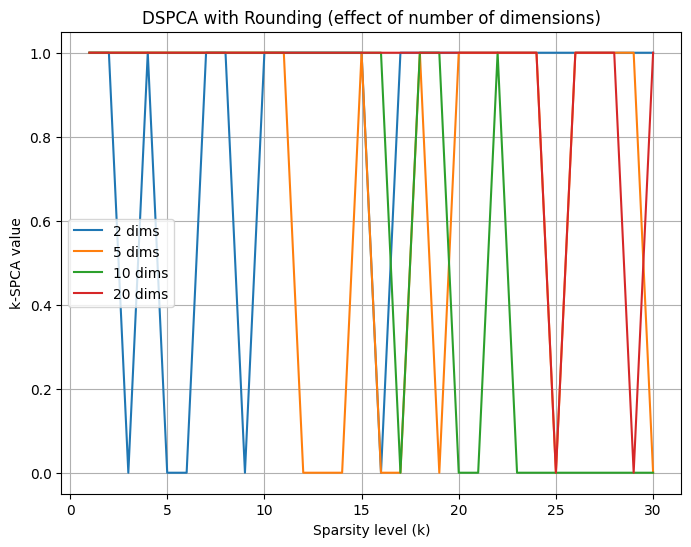

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import SparsePCA

def dspca_with_rounding(X, k, epsilon=1e-4):  # Increased epsilon value
    spca = SparsePCA(n_components=k, alpha=0.5, max_iter=500)  # Reduced alpha for stability
    spca.fit(X)
    w = spca.components_[0]

    # Print w before and after rounding for debugging
    print(f"Original w: {w}")
    w[np.abs(w) < epsilon] = 0
    print(f"Rounded w: {w}")

    return w

# Set up parameters
K = 30  # Maximum sparsity level (k)
p = 10  # Number of dimensions
n_samples_list = [100, 1000, 10000, 100000]  # Different sample sizes
n_dims_list = [2, 5, 10, 20]  # Different numbers of dimensions
results_n_samples = {}
results_n_dims = {}

# Compute DSPCA for different sample sizes
for n_samples in n_samples_list:
    results_n_samples[n_samples] = []
    for k in range(1, K + 1):  # Sparsity levels from 1 to 30
        # Generate random data matrix B
        B = np.random.randn(n_samples, p)
        B /= np.linalg.norm(B, axis=1, ord=2, keepdims=True)  # Normalize rows

        # Compute the DSPCA lower bound for each sparsity level
        w_sparse = dspca_with_rounding(B, k)
        results_n_samples[n_samples].append(np.linalg.norm(w_sparse, ord=2))

# Plotting DSPCA with rounding (effect of number of samples)
plt.figure(figsize=(8, 6))
plt.title("DSPCA with Rounding (effect of number of samples)")
for n_sample in results_n_samples:
    plt.plot(range(1, 31), results_n_samples[n_sample], label=f'{n_sample} samples')
plt.xlabel("Sparsity level (k)")
plt.ylabel("k-SPCA value")
plt.legend()
plt.grid(True)
plt.savefig("sampling_lower_bound_dspca.png", dpi=300)
plt.show()

# Compute DSPCA for different dimensions
for n_dims in n_dims_list:
    results_n_dims[n_dims] = []
    for k in range(1, K + 1):
        # Generate random data matrix B (using a fixed number of samples for consistency)
        B = np.random.randn(10000, n_dims)  # Use 10000 samples for consistency
        B /= np.linalg.norm(B, axis=1, ord=2, keepdims=True)  # Normalize rows

        # Compute the DSPCA lower bound for each sparsity level
        w_sparse = dspca_with_rounding(B, k)
        results_n_dims[n_dims].append(np.linalg.norm(w_sparse, ord=2))

# Plotting DSPCA with rounding (effect of number of dimensions)
plt.figure(figsize=(8, 6))
plt.title("DSPCA with Rounding (effect of number of dimensions)")
for n_dim in results_n_dims:
    plt.plot(range(1, 31), results_n_dims[n_dim], label=f'{n_dim} dims')
plt.xlabel("Sparsity level (k)")
plt.ylabel("k-SPCA value")
plt.legend()
plt.grid(True)
plt.savefig("number_of_dims_dspca.png", dpi=300)
plt.show()